## Simplifying Data

Select a variable, count how many times each unique value occurs, and represent the frequencies ie. the number of times the unique value occurs.

In [1]:
import pandas as pd
wnba = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [2]:
wnba.shape

(143, 32)

In [3]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

## Frequencies

To generate a frequency distribution table using Python, we can use the Series.value_counts() method.

In [4]:
print(wnba['Pos'].value_counts())

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64


We see how the frequencies are distributed:
    
- Almost half of the players play as guards
- Most of the players are either guards, forwards or centers
- Very few players have combined positions (like guard/forward or forward/center) 

Comparisons:

- There are roughly two times more guards than forwards
- There are slightly less centers that forwards

## Frequency distribution table

In [5]:
freq_distro_pos = wnba['Pos'].value_counts()
freq_distro_pos

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [6]:
freq_distro_height = wnba['Height'].value_counts()
freq_distro_height

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

## Sorting frequency distribution tables

In [7]:
print(wnba['Height'].value_counts().sort_index())

165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: Height, dtype: int64


In [8]:
age_ascending = wnba['Age'].value_counts().sort_index()
age_ascending

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

In [9]:
age_descending = wnba['Age'].value_counts().sort_index(ascending=False)
age_descending

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

## Sorting tables for ordinal values

The sorting techniques above can't be used for ordinal scales where the measurement is done using words. Let us take the following example.

In [10]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1) # new column

In [11]:
print(wnba[['Name', 'PTS', 'PTS_ordinal_scale']].head())

              Name  PTS         PTS_ordinal_scale
0    Aerial Powers   93   many, but below average
1      Alana Beard  217  average number of points
2     Alex Bentley  218  average number of points
3  Alex Montgomery  188  average number of points
4     Alexis Jones   50                few points


In [12]:
wnba['PTS_ordinal_scale'].value_counts()

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

In [13]:
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts()[['much more than average', 
                                                             'more than average', 
                                                             'average number of points', 
                                                             'many, but below average', 
                                                             'few points', 'very few points']]
pts_ordinal_desc

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

In [14]:
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]
pts_ordinal_desc

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

## Proportions and percentages

Let us take the distribution of the Pos (player position) variable:

- What proportion of players are guards?
- What percentage of players are centers?
- What percentage of players have mixed positions?

## Proportions

In [15]:
print(wnba['Pos'].value_counts())

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64


In [16]:
print(wnba['Pos'].value_counts() / len(wnba))

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64


In [17]:
print(wnba['Pos'].value_counts(normalize = True)) # normalize = True makes it slightly faster

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64


## Percentages

In [18]:
print(wnba['Pos'].value_counts(normalize = True) * 100)

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64


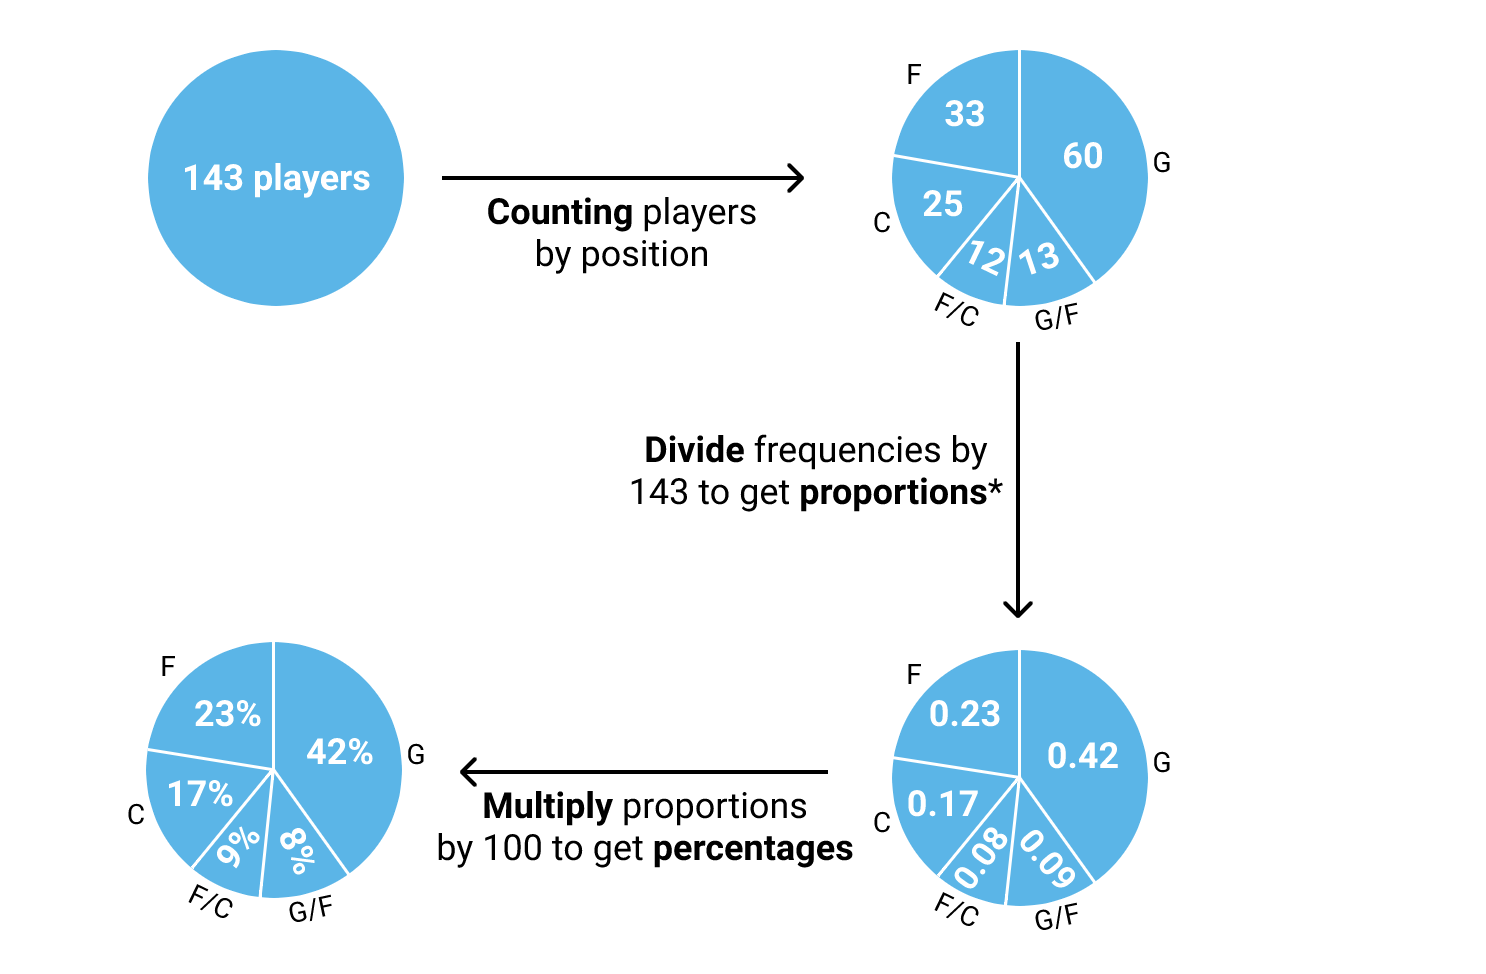

In [19]:
percentages = wnba['Age'].value_counts(normalize = True).sort_index() * 100
percentages

21     1.398601
22     6.993007
23    10.489510
24    11.188811
25    10.489510
26     8.391608
27     9.090909
28     9.790210
29     5.594406
30     6.293706
31     5.594406
32     5.594406
33     2.097902
34     3.496503
35     2.797203
36     0.699301
Name: Age, dtype: float64

In [20]:
proportion_25 = percentages[25] / 100
proportion_25


0.1048951048951049

In [21]:
percentage_30 = percentages[30]
percentage_30


6.293706293706294

In [22]:
percentage_over_30 = percentages.loc[30:].sum()
percentage_over_30


26.573426573426573

In [23]:
percentage_below_23 = percentages.loc[:23].sum()
percentage_below_23

18.88111888111888

The percentage of players aged 23 years or younger is 18.88%

## Percentiles and percentile Ranks

19% of the ages in the dataset are 23 or lower. This 19% is called percentile rank. 

In this context, the value of 23 is called the 19th percentile. If a value x is the 19th percentile, it means that 19% of all the values in the distribution are equal to or less than x.

In [24]:
 wnba['Age'].min()

21

In [25]:
 wnba['Age'].max()

36

23 has a percentile rank of 19%. This means 23 is the 19th percentile.

"What percentage of players are 23 years or younger?" Answer: 18.881%

In [26]:
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

18.88111888111888


We need to use kind = 'weak' to indicate that we want to find the percentage of values that are equal to or less than the value we specify in the score parameter.

Another question, what percentage of players are 30 years or older? Percentile ranks is the answer. 

First, find the % of values equal to or less than 29 years. That is the percentile rank of 29. The rest of the values must be 30 years or more.

In [27]:
print(percentileofscore(wnba['Age'], 29, kind = 'weak'))

73.42657342657343


In [28]:
100 - 73.42657342657343

26.573426573426573

In [29]:
print(100 - percentileofscore(wnba['Age'], 29, kind = 'weak'))

26.573426573426573


### What percentage of players played half the number of games or less in the 2016-2017 season?

In [30]:
print(wnba.columns)


Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'PTS_ordinal_scale'],
      dtype='object')


In [31]:
wnba['Games Played']

0       8
1      30
2      26
3      31
4      24
       ..
138    29
139    22
140    27
141    29
142    30
Name: Games Played, Length: 143, dtype: int64

In [32]:
print(wnba['Games Played'].min())
print(wnba['Games Played'].max())

2
32


In [33]:
# there are 34 games in the WNBA’s regular season
34/2

17.0

In [34]:
from scipy.stats import percentileofscore
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind = 'weak') # half the number of games = 17
percentage_half_more = 100 - percentile_rank_half_less
percentage_half_more

83.91608391608392

We need to use kind = 'weak' to indicate that we want to find the percentage of values thar are equal to or less than the value we specify in the score parameter.

## Finding percentiles with pandas

In [35]:
print(wnba['Age'].describe())

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64


Series.desribe() returns by default the 25th, the 50th, and the 75th percentiles

In [36]:
print(wnba['Age'].describe().iloc[3:])

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64


In [37]:
print(wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:])

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64


## Grouped frequency distribution tables

In [38]:
print(wnba['Weight'].value_counts().sort_index())

55.0      1
57.0      1
58.0      1
59.0      2
62.0      1
63.0      3
64.0      5
65.0      4
66.0      8
67.0      1
68.0      2
69.0      2
70.0      3
71.0      2
73.0      6
74.0      4
75.0      4
76.0      4
77.0     10
78.0      5
79.0      6
80.0      3
81.0      5
82.0      4
83.0      4
84.0      9
85.0      2
86.0      7
87.0      6
88.0      6
89.0      3
90.0      2
91.0      3
93.0      3
95.0      2
96.0      2
97.0      1
104.0     2
108.0     1
113.0     2
Name: Weight, dtype: int64


In [39]:
print(wnba['PTS'].value_counts().sort_index())

2      1
3      1
6      2
7      1
8      1
      ..
545    1
572    1
577    1
582    1
584    1
Name: PTS, Length: 123, dtype: int64


In [40]:
print(wnba['BMI'].value_counts().sort_index())

18.390675    1
18.612245    1
19.265306    1
19.486961    1
19.753086    1
            ..
27.920213    1
28.507990    1
29.414827    1
30.336385    1
31.555880    1
Name: BMI, Length: 107, dtype: int64


In [41]:
print(wnba['MIN'].value_counts().sort_index())

12      1
16      1
22      1
28      1
32      1
       ..
947     1
948     1
952     2
996     1
1018    1
Name: MIN, Length: 132, dtype: int64


There is a lot of granularity in the table above, and hence it is not easy to find patterns. The table for the Weight variable is a relatively happy case - the frequency tables for variables like PTS, BMI, or MIN are even more daunting.

What's the solution? If the variable is measured on an interval or ratio scale, a common solution to this problem is to group the values in equal intervals. For the Weight variable, the values range from 55 to 113 kg, which amounts to a difference of 58 kg. We can try to segment this 58 kg interval in ten smaller and equal intervals. This will result in ten intervals of 5.8 kg each.
Fortunately, pandas can handle this process gracefully. 

In [42]:
print(wnba['Weight'].value_counts(bins = 10).sort_index())

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64


 The ( character indicates that the starting point is not included, while the ] indicates that the endpoint is included.

Using the grouped frequency distribution table we generated above for the Weight variable, we can find patterns easier in the distribution of values:

- Most players weigh somewhere between 70 and 90 kg
- Very few players weigh over 100 kg
- Very few players weigh under 60 kg

In [43]:
grouped_freq_table = wnba['PTS'].value_counts(bins = 10,
                normalize = True).sort_index(ascending = False) * 100

In [44]:
grouped_freq_table

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

- The PTS table has 10 class intervals
- For each class interval, the table shows percentages instead of frequencies
- The class intervals are sorted in descending order


## Information loss

When we generate grouped frequency distribution tables, there's an inevitable information loss. Let's consider this table below

In [45]:
print(wnba['PTS'].value_counts(bins = 10))

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(234.8, 293.0]    17
(118.4, 176.6]    17
(351.2, 409.4]    10
(409.4, 467.6]     8
(293.0, 351.2]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64


Because we grouped the values, we lost more granular information like:
    
- How many players, if any, scored exactly 50 points.
- How many players scored under 10 points.
- How many players scored between 20 and 30 points, etc.

To get back this granular information, we can increase the number of class intervals. However, if we do that, we end up again with a table that's lengthy and very difficult to analyze.

On the other side, if we decrease the number of class intervals, we lose even more information:

In [46]:
print(wnba['PTS'].value_counts(bins = 5).sort_index())

(1.417, 118.4]    54
(118.4, 234.8]    37
(234.8, 351.2]    25
(351.2, 467.6]    18
(467.6, 584.0]     9
Name: PTS, dtype: int64


There are 54 players that scored between 2 and 118 points. We can get this information from the first table above too, but there's some extra information there: among these 54 players, 30 scored between 2 and 60 points, and 24 scored between 61 and 118 points. We lost this information when we decreased the number of class intervals from 10 to 5.

We can conclude there is a trade-off between the information in a table, and how comprehensible the table is. When we increase the number of class intervals(each group interval in a grouped frequency distribution table), we can get more information, but the table becomes harder to analyze. When we decrease the number of class intervals, we get a boost in comprehensibility, but the amount of information in the table decreases.

As a rule of thumb, 10 is a good number of class intervals to choose because it offers a good balance between information and comprehensibility.

In [47]:
grouped_freq_table_1 = wnba['MIN'].value_counts(bins=1, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_1

(10.993, 1018.0]    100.0
Name: MIN, dtype: float64

In [48]:
grouped_freq_table_2 = wnba['MIN'].value_counts(bins=2, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_2

(515.0, 1018.0]    48.251748
(10.993, 515.0]    51.748252
Name: MIN, dtype: float64

In [49]:
grouped_freq_table_3 = wnba['MIN'].value_counts(bins=3, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_3

(682.667, 1018.0]     31.468531
(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
Name: MIN, dtype: float64

In [50]:
grouped_freq_table_5 = wnba['MIN'].value_counts(bins=5, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_5

(816.8, 1018.0]    19.580420
(615.6, 816.8]     20.279720
(414.4, 615.6]     17.482517
(213.2, 414.4]     22.377622
(10.993, 213.2]    20.279720
Name: MIN, dtype: float64

In [51]:
grouped_freq_table_10 = wnba['MIN'].value_counts(bins=10, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_10

(917.4, 1018.0]     6.293706
(816.8, 917.4]     13.286713
(716.2, 816.8]      9.790210
(615.6, 716.2]     10.489510
(515.0, 615.6]      8.391608
(414.4, 515.0]      9.090909
(313.8, 414.4]     10.489510
(213.2, 313.8]     11.888112
(112.6, 213.2]      6.993007
(10.993, 112.6]    13.286713
Name: MIN, dtype: float64

In [52]:
grouped_freq_table_15 = wnba['MIN'].value_counts(bins=15, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_15

(950.933, 1018.0]     2.797203
(883.867, 950.933]    7.692308
(816.8, 883.867]      9.090909
(749.733, 816.8]      5.594406
(682.667, 749.733]    6.293706
(615.6, 682.667]      8.391608
(548.533, 615.6]      6.293706
(481.467, 548.533]    5.594406
(414.4, 481.467]      5.594406
(347.333, 414.4]      9.090909
(280.267, 347.333]    4.195804
(213.2, 280.267]      9.090909
(146.133, 213.2]      2.797203
(79.067, 146.133]     7.692308
(10.993, 79.067]      9.790210
Name: MIN, dtype: float64

In [53]:
grouped_freq_table_20 = wnba['MIN'].value_counts(bins=20, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_20

(967.7, 1018.0]    1.398601
(917.4, 967.7]     4.895105
(867.1, 917.4]     4.895105
(816.8, 867.1]     8.391608
(766.5, 816.8]     2.797203
(716.2, 766.5]     6.993007
(665.9, 716.2]     5.594406
(615.6, 665.9]     4.895105
(565.3, 615.6]     5.594406
(515.0, 565.3]     2.797203
(464.7, 515.0]     4.895105
(414.4, 464.7]     4.195804
(364.1, 414.4]     6.293706
(313.8, 364.1]     4.195804
(263.5, 313.8]     4.195804
(213.2, 263.5]     7.692308
(162.9, 213.2]     2.797203
(112.6, 162.9]     4.195804
(62.3, 112.6]      4.895105
(10.993, 62.3]     8.391608
Name: MIN, dtype: float64

In [54]:
grouped_freq_table_40 = wnba['MIN'].value_counts(bins=40, normalize=True).sort_index(ascending=False) * 100
grouped_freq_table_40

(992.85, 1018.0]    1.398601
(967.7, 992.85]     0.000000
(942.55, 967.7]     2.797203
(917.4, 942.55]     2.097902
(892.25, 917.4]     2.797203
(867.1, 892.25]     2.097902
(841.95, 867.1]     4.195804
(816.8, 841.95]     4.195804
(791.65, 816.8]     2.097902
(766.5, 791.65]     0.699301
(741.35, 766.5]     3.496503
(716.2, 741.35]     3.496503
(691.05, 716.2]     2.097902
(665.9, 691.05]     3.496503
(640.75, 665.9]     2.097902
(615.6, 640.75]     2.797203
(590.45, 615.6]     3.496503
(565.3, 590.45]     2.097902
(540.15, 565.3]     0.699301
(515.0, 540.15]     2.097902
(489.85, 515.0]     2.797203
(464.7, 489.85]     2.097902
(439.55, 464.7]     3.496503
(414.4, 439.55]     0.699301
(389.25, 414.4]     2.097902
(364.1, 389.25]     4.195804
(338.95, 364.1]     2.797203
(313.8, 338.95]     1.398601
(288.65, 313.8]     1.398601
(263.5, 288.65]     2.797203
(238.35, 263.5]     2.797203
(213.2, 238.35]     4.895105
(188.05, 213.2]     2.097902
(162.9, 188.05]     0.699301
(137.75, 162.9

## Readability for grouped frequency tables

We can define the intervals ourselves for better understanding and readability.

In [55]:
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')


In [56]:
gr_freq_table = wnba["PTS"].value_counts(bins = intervals).sort_index()
print(gr_freq_table)

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
Name: PTS, dtype: int64


In [57]:
print(gr_freq_table.sum())

143


## Grouped frequency table for the PTS variable

- The first class interval starts at 0 (not included).
- The last class interval ends at 600 (included).
- Each interval has a range of 60 points.
- There are 10 class intervals.

In [58]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
intervals

IntervalIndex([(0, 60], (60, 120], (120, 180], (180, 240], (240, 300], (300, 360], (360, 420], (420, 480], (480, 540], (540, 600]],
              closed='right',
              dtype='interval[int64]')

In [59]:
gr_freq_table_10 = wnba["PTS"].value_counts(bins = intervals).sort_index()
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
Name: PTS, dtype: int64

## Frequency tables and continuous variables

### Real Limits

If we measure the weight with zero decimals precision (which we do in our dataset), a player weighing 77.4 kg will be assigned the same weight (77 kg) as a player weighing 76.6 kg. So if a player's recorded weight is 77 kg, we can only tell that her actual weight is somewhere between 76.5 kg and 77.5 kg. The value of 77 is not really a distinct value here. Rather, it's an interval of values.

This principle applies to any possible numerical weight value. If a player is measured to weigh 76.5 kg, we can only tell that her weight is somewhere between 76.45 kg and 76.55 kg. If a player has 77.50 kg, we can only tell that her weight is somewhere between 77.495 kg and 77.505 kg. Because there can be an infinite number of decimals, we could continue this breakdown infinitely.

Generally, every value of a continuous variable is an interval, no matter how precise the value is. The boundaries of an interval are sometimes called real limits. The lower boundary of the interval is called lower real limit, and the upper boundary is called upper real limit.

When we build frequency tables for continuous variables, we need to take into account that the values are intervals.
A height of 175 cm is just an interval bounded by the real limits of 174.5 cm (lower real limit) and 175.5 (upper real limit).

This doesn't mean that there are 16 players that are all exactly 175 cm tall. It means that there are 16 players with a height that's somewhere between 174.5 cm and 175.5 cm. Standard rounding rules determine that, for example, a player whose height is 174.6 should be recorded as having a height of 175.

The height of 175 cm has a frequency of 16 in the distribution of the Height variable.

In [60]:
print(wnba['Height'].value_counts()[175])

16


Continuous variables also affect the way we read percentiles. For instance, the 50th percentile (middle quartile) in the distribution of the Height variable is 185 cm.

In [61]:
print(wnba['Height'].describe().iloc[3:])

min    165.0
25%    176.5
50%    185.0
75%    191.0
max    206.0
Name: Height, dtype: float64


This means that 50% of the values are less than or equal to 185.5 cm (the upper limit of 185 cm), not equal to 185 cm.

Now, we know how to organize data in frequency and grouped frequency tables. Frequency tables allow us to transform large and incomprehensible amounts of data to a format we can understand.